In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import math

In [3]:
train = pd.read_csv("C:\\Users\\iAmBr\\OneDrive\\Desktop\\New folder\\p2 - bigmart sales prediction\\train.csv")

In [4]:
test = pd.read_csv("C:\\Users\\iAmBr\\OneDrive\\Desktop\\New folder\\p2 - bigmart sales prediction\\test.csv")

In [5]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [7]:
train['source'] = 'train'
test['source'] = 'test'

In [8]:
data = pd.concat([train,test])

In [9]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.50,1997,OUT046,Tier 1,Small,Supermarket Type1,test
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.60,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.00,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
5679,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.30,2007,OUT017,Tier 2,NaN,Supermarket Type1,test


In [10]:
train.shape

(8523, 13)

In [11]:
test.shape

(5681, 12)

In [12]:
8523+5681

14204

In [14]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [15]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [17]:
correlation = data.corr()

In [18]:
correlation

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_MRP,1.000000,0.567574,-0.006351,0.036236,0.000141
Item_Outlet_Sales,0.567574,1.000000,-0.128625,0.014123,-0.049135
Item_Visibility,-0.006351,-0.128625,1.000000,-0.015901,-0.083678
Item_Weight,0.036236,0.014123,-0.015901,1.000000,0.000645
Outlet_Establishment_Year,0.000141,-0.049135,-0.083678,0.000645,1.000000


In [19]:
correlation['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [20]:
#exploratory data analysis

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

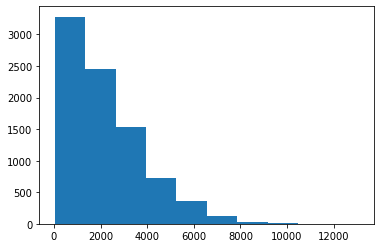

In [21]:
plt.hist(data['Item_Outlet_Sales'])

In [22]:
numerical_features = data.select_dtypes(include=np.number)

In [23]:
categorical_features = data.select_dtypes(include = object)

In [24]:
categorical_features.dtypes

Item_Fat_Content        object
Item_Identifier         object
Item_Type               object
Outlet_Identifier       object
Outlet_Location_Type    object
Outlet_Size             object
Outlet_Type             object
source                  object
dtype: object

In [25]:
numerical_features.dtypes

Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
dtype: object

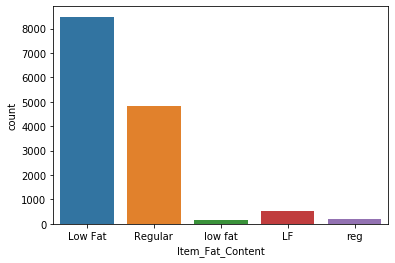

In [26]:
sns.countplot(data.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

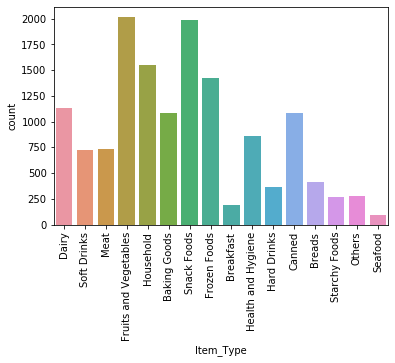

In [27]:
sns.countplot(data.Item_Type)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

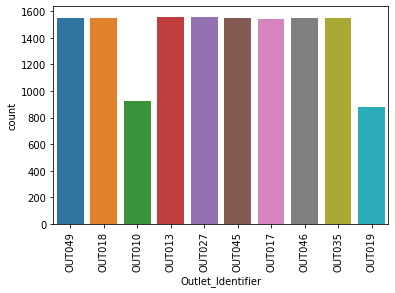

In [28]:
sns.countplot(data.Outlet_Identifier)
plt.xticks(rotation = 90)

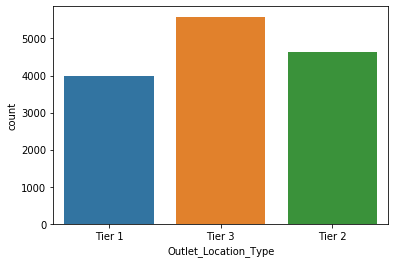

In [29]:
sns.countplot(data.Outlet_Location_Type)

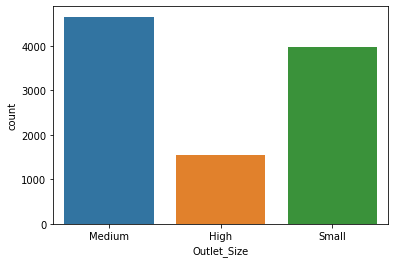

In [30]:
sns.countplot(data.Outlet_Size)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

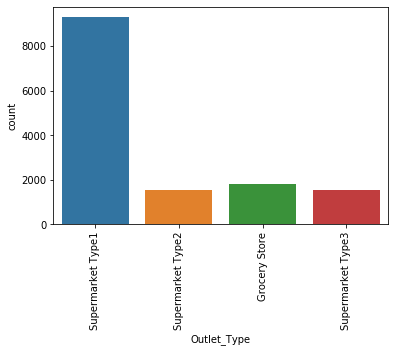

In [31]:
sns.countplot(data.Outlet_Type)
plt.xticks(rotation = 90)

(array([   0,    1,    2, ..., 1556, 1557, 1558]),
 <a list of 1559 Text xticklabel objects>)

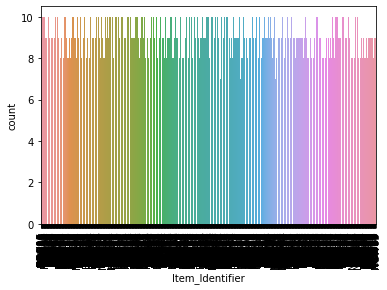

In [32]:
sns.countplot(data.Item_Identifier)
plt.xticks(rotation = 90)

In [33]:
#bivairate analysis

In [34]:
numerical_features.dtypes

Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
dtype: object

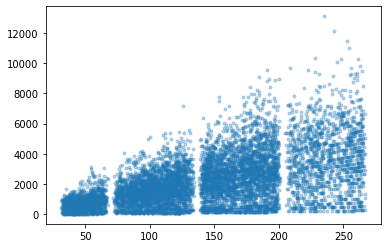

In [35]:
plt.plot(data.Item_MRP,data.Item_Outlet_Sales,'.',alpha = 0.3)

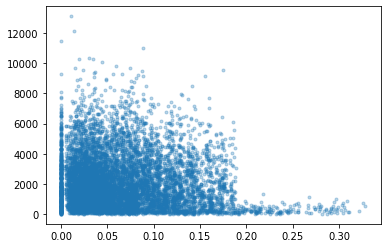

In [36]:
plt.plot(data.Item_Visibility,data.Item_Outlet_Sales,'.',alpha = 0.3)

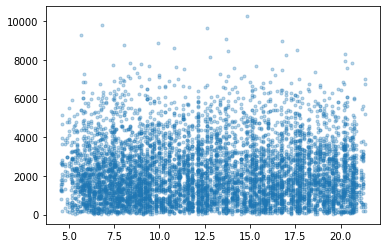

In [37]:
plt.plot(data.Item_Weight,data.Item_Outlet_Sales,'.',alpha = 0.3)

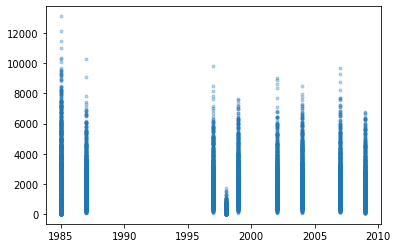

In [38]:
plt.plot(data.Outlet_Establishment_Year,data.Item_Outlet_Sales,'.',alpha = 0.3)

In [39]:
categorical_features.dtypes

Item_Fat_Content        object
Item_Identifier         object
Item_Type               object
Outlet_Identifier       object
Outlet_Location_Type    object
Outlet_Size             object
Outlet_Type             object
source                  object
dtype: object

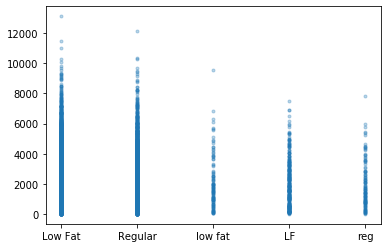

In [40]:
plt.plot(data.Item_Fat_Content,data.Item_Outlet_Sales,'.',alpha = 0.3)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

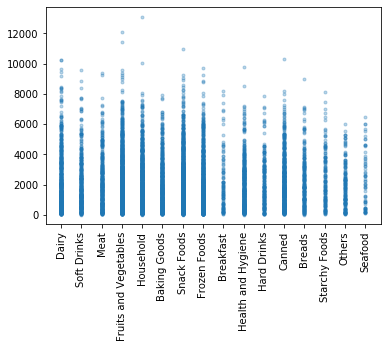

In [41]:
plt.plot(data.Item_Type,data.Item_Outlet_Sales,'.',alpha = 0.3)
plt.xticks(rotation = 90)

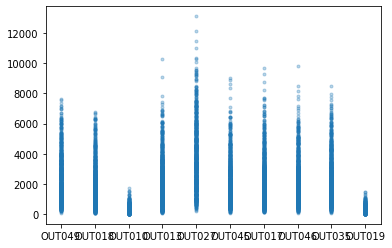

In [42]:
plt.plot(data.Outlet_Identifier,data.Item_Outlet_Sales,'.',alpha = 0.3)

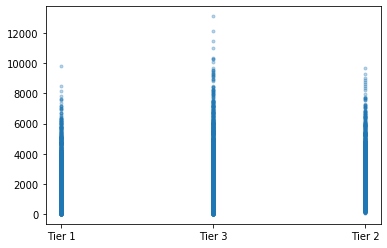

In [43]:
plt.plot(data.Outlet_Location_Type,data.Item_Outlet_Sales,'.',alpha = 0.3)

In [44]:
len(data.Outlet_Identifier.unique())

10

In [45]:
#data Pre-processing

In [46]:
k = data['Item_Visibility'].mean()

In [47]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0,k)

In [48]:
print(k)

0.06595278007399345


In [49]:
data.isnull().any()

Item_Fat_Content             False
Item_Identifier              False
Item_MRP                     False
Item_Outlet_Sales             True
Item_Type                    False
Item_Visibility              False
Item_Weight                   True
Outlet_Establishment_Year    False
Outlet_Identifier            False
Outlet_Location_Type         False
Outlet_Size                   True
Outlet_Type                  False
source                       False
dtype: bool

In [50]:
data.isnull().sum()/data.shape[0] * 100

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

In [51]:
#filling the missing values

In [52]:
data['Outlet_Size'].isnull().sum()

4016

In [53]:
outlet_size_mode = data.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type',aggfunc = lambda x: x.mode())

In [55]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [59]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
        print(outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0])
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))


Orignal #missing: 0
Final #missing: 0


In [57]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [58]:
data.Item_Weight.isnull().sum()

2439

In [61]:
mean_weight = data.pivot_table(index = 'Item_Identifier',values = 'Item_Weight')

In [62]:
mean_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [78]:
def impute_weight(cols):
    weight = cols[0]
    identifier = cols[1]
    if pd.isnull(weight):
        return mean_weight['Item_Weight'][mean_weight.index==identifier]
    else:
        return weight
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis = 1)

In [79]:
data['Item_Weight'].isnull().sum()

0

In [80]:
data['Item_Weight'].isnull().any()

False

In [81]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [84]:
data['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.065953
4       0.065953
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.065953
5680    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [85]:
#feature engineering
#its time to chagne the data which deoesnot make sense into useful

In [88]:
data['Outlet_Establishment_Year'].max()

2009

In [89]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

In [90]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.3,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.5,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.2,1998,OUT010,Tier 3,Small,Grocery Store,train,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test,16
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test,4
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10,2002,OUT045,Tier 2,Small,Supermarket Type1,test,11
5679,Regular,FDJ26,214.6218,NaN,Canned,0.065953,15.3,2007,OUT017,Tier 2,Small,Supermarket Type1,test,6


In [92]:
data['Item_type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [93]:
data['Item_type_Combined']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_type_Combined, Length: 14204, dtype: object

In [94]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Weight_Combined,Item_type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.3,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,FD,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4,DR,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.5,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,FD,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.2,1998,OUT010,Tier 3,Small,Grocery Store,train,15,FD,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26,NC,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test,16,FD,FD
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test,4,FD,FD
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10,2002,OUT045,Tier 2,Small,Supermarket Type1,test,11,NC,NC
5679,Regular,FDJ26,214.6218,NaN,Canned,0.065953,15.3,2007,OUT017,Tier 2,Small,Supermarket Type1,test,6,FD,FD


In [96]:
data = data.drop(['Item_Weight_Combined'],axis = 1)


In [97]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.3,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.5,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.2,1998,OUT010,Tier 3,Small,Grocery Store,train,15,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test,16,FD
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test,4,FD
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10,2002,OUT045,Tier 2,Small,Supermarket Type1,test,11,NC
5679,Regular,FDJ26,214.6218,NaN,Canned,0.065953,15.3,2007,OUT017,Tier 2,Small,Supermarket Type1,test,6,FD


In [102]:
data['Item_type_Combined'] = data['Item_type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [105]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [106]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_type_Combined,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.3,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,NaN,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4,NaN,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.5,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,NaN,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.2,1998,OUT010,Tier 3,Small,Grocery Store,train,15,NaN,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26,NaN,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test,16,NaN,FD
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test,4,NaN,FD
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10,2002,OUT045,Tier 2,Small,Supermarket Type1,test,11,NaN,NC
5679,Regular,FDJ26,214.6218,NaN,Canned,0.065953,15.3,2007,OUT017,Tier 2,Small,Supermarket Type1,test,6,NaN,FD


In [108]:
data = data.drop(['Item_type_Combined'],axis = 1)

In [109]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.3,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.5,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.2,1998,OUT010,Tier 3,Small,Grocery Store,train,15,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test,16,FD
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test,4,FD
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10,2002,OUT045,Tier 2,Small,Supermarket Type1,test,11,NC
5679,Regular,FDJ26,214.6218,NaN,Canned,0.065953,15.3,2007,OUT017,Tier 2,Small,Supermarket Type1,test,6,FD


In [112]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [113]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.3,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.5,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.2,1998,OUT010,Tier 3,Small,Grocery Store,train,15,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test,16,Food
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test,4,Food
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10,2002,OUT045,Tier 2,Small,Supermarket Type1,test,11,Non-Consumable
5679,Regular,FDJ26,214.6218,NaN,Canned,0.065953,15.3,2007,OUT017,Tier 2,Small,Supermarket Type1,test,6,Food


In [114]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [116]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [117]:
data['Item_Fat_Content'].unique()

array([nan, 'Low Fat', 'Regular'], dtype=object)

In [118]:
data.isnull().any()

Item_Fat_Content              True
Item_Identifier              False
Item_MRP                     False
Item_Outlet_Sales             True
Item_Type                    False
Item_Visibility              False
Item_Weight                  False
Outlet_Establishment_Year    False
Outlet_Identifier            False
Outlet_Location_Type         False
Outlet_Size                  False
Outlet_Type                  False
source                       False
Outlet_Years                 False
Item_Type_Combined           False
dtype: bool

In [119]:
data.Item_Fat_Content.isnull().sum()

13309

In [120]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined
0,NaN,FDA15,249.8092,3735.1380,Dairy,0.016047,9.3,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,Food
1,NaN,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4,Drinks
2,NaN,FDN15,141.6180,2097.2700,Meat,0.016760,17.5,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,Food
3,NaN,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.2,1998,OUT010,Tier 3,Small,Grocery Store,train,15,Food
4,NaN,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,NaN,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test,16,Food
5677,NaN,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test,4,Food
5678,NaN,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10,2002,OUT045,Tier 2,Small,Supermarket Type1,test,11,Non-Consumable
5679,NaN,FDJ26,214.6218,NaN,Canned,0.065953,15.3,2007,OUT017,Tier 2,Small,Supermarket Type1,test,6,Food


In [121]:
data1 = pd.read_csv('D://data.csv')

In [130]:
data['Item_Fat_Content'] = data1['Item_Fat_Content']

In [131]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.3,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.5,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.2,1998,OUT010,Tier 3,Small,Grocery Store,train,15,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Low Fat,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test,16,Food
5677,Low Fat,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test,4,Food
5678,Regular,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10,2002,OUT045,Tier 2,Small,Supermarket Type1,test,11,Non-Consumable
5679,Low Fat,FDJ26,214.6218,NaN,Canned,0.065953,15.3,2007,OUT017,Tier 2,Small,Supermarket Type1,test,6,Food


In [132]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [133]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [134]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [135]:
data.Item_Fat_Content.isnull().any()

False

In [136]:
data.isnull().any()

Item_Fat_Content             False
Item_Identifier              False
Item_MRP                     False
Item_Outlet_Sales             True
Item_Type                    False
Item_Visibility              False
Item_Weight                  False
Outlet_Establishment_Year    False
Outlet_Identifier            False
Outlet_Location_Type         False
Outlet_Size                  False
Outlet_Type                  False
source                       False
Outlet_Years                 False
Item_Type_Combined           False
dtype: bool

In [137]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [140]:
new_categorical_features = data.select_dtypes(include = object)

In [142]:
new_categorical_features.dtypes

Item_Fat_Content        object
Item_Identifier         object
Item_Type               object
Item_Weight             object
Outlet_Identifier       object
Outlet_Location_Type    object
Outlet_Size             object
Outlet_Type             object
source                  object
Item_Type_Combined      object
dtype: object

In [146]:
data['Outlet'] = label_encoder.fit_transform(data['Outlet_Identifier'])

In [147]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

In [149]:
for i in var_mod:
    data[i] = label_encoder.fit_transform(data[i])

In [150]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.3,1999,OUT049,0,1,1,train,14,1,9
1,1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,4,0,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.5,1999,OUT049,0,1,1,train,14,1,9
3,1,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.2,1998,OUT010,2,2,0,train,15,1,0
4,0,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,2,0,1,train,26,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,0,2,1,test,16,1,8
5677,0,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,2,1,2,test,4,1,3
5678,1,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10,2002,OUT045,1,2,1,test,11,2,7
5679,0,FDJ26,214.6218,NaN,Canned,0.065953,15.3,2007,OUT017,1,2,1,test,6,1,2


In [151]:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [152]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                   object
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [154]:
data = data.drop(['Item_Type','Outlet_Establishment_Year'],axis = 1)

In [155]:
train = data.loc[data['source']=='train']

In [156]:
test = data.loc[data['source']=='test']

In [157]:
train.drop(['source'],axis = 1,inplace = True)

In [158]:
train

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.3,OUT049,14,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,4,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.5,OUT049,14,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.065953,19.2,OUT010,15,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.065953,8.93,OUT013,26,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,214.5218,2778.3834,0.056783,6.865,OUT013,26,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,108.1570,549.2850,0.046982,8.38,OUT045,11,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,85.1224,1193.1136,0.035186,10.6,OUT035,9,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,103.1332,1845.5976,0.145221,7.21,OUT018,4,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [159]:
test.drop(['source'],axis = 1,inplace = True)

In [160]:
test

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,107.8622,NaN,0.007565,20.75,OUT049,14,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,87.3198,NaN,0.038428,8.3,OUT017,6,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,241.7538,NaN,0.099575,14.6,OUT010,15,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,155.0340,NaN,0.015388,7.315,OUT017,6,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,234.2300,NaN,0.118599,[13.599999999999998],OUT027,28,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,141.3154,NaN,0.013496,10.5,OUT046,16,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5677,FDD47,169.1448,NaN,0.142991,7.6,OUT018,4,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5678,NCO17,118.7440,NaN,0.073529,10,OUT045,11,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5679,FDJ26,214.6218,NaN,0.065953,15.3,OUT017,6,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [164]:
train.to_csv('C:\\Users\\iAmBr\\OneDrive\\Desktop\\New folder\\p2 - bigmart sales prediction\\train_modified.csv')

In [165]:
test.to_csv('C:\\Users\\iAmBr\\OneDrive\\Desktop\\New folder\\p2 - bigmart sales prediction\\test_modified.csv')

In [167]:
train1 = train
test2 = test

In [168]:
x_train = train1.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis = 1)

In [169]:
x_train

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,0.016047,9.3,14,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,0.019278,5.92,4,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,0.016760,17.5,14,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,0.065953,19.2,15,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,0.065953,8.93,26,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,214.5218,0.056783,6.865,26,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
8519,108.1570,0.046982,8.38,11,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,85.1224,0.035186,10.6,9,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,103.1332,0.145221,7.21,4,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [170]:
y_test = test2['Item_Outlet_Sales']

In [171]:
x_test = train['Item_Outlet_Sales']
y_train = test2.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis = 1)

In [174]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,x_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
y_pred = model.predict(y_train)

In [178]:
y_test = x_test**2